<img src="Logo-ikiam-.png" width=300 height=240 />

<h1><center>TAREA 2 - Parcial 2</center></h1>

<h2><center>GBI6-2021II: BIOINFORMÁTICA</center></h2>

**<h3><center>Freire Torres, Camila Micaela</center></h3>**

**<h4><center>Fecha de entrega: 16-02-2022</center></h4>**

## <font color='brown'>Ejercicio 1</font>

Basado en las sesiones de **Visualización de datos** y **Expresiones resulares**. Realice una adaptación de la solución del MAP OF SCIENCE. Se requiere dos adaptaciones para resolver esta actividad:

1. Buscar bibliografía de un tema de interés propio en la Página Web de PubMed,
2. Realizar el minado de autores por país (en el ejemplo se encuentra realziado por las ciudades de USA). 
3. Para asignar las ubicación geográfica de los centroides de cada país (latitud y longitud), utilice la tabla  **Ubicación Geográfica de Países - Google Developer**. Así como en la solución de referencia se señalan varias ciudades seleccionadas de USA. 
4. En su resolución señale/resalte a los siguientes países: USA, UK, Brazil, China, Australia, Norway.  

*Cargue su cuaderno de Jupyter en GitHub, asegurandose de lo siguiente:*

- En el documento se puede ver con claridad el Mapa de Ciencia de su tema de interés.
- La figura tiene etiquetas adecuadas en los ejes de la visualización. 
- Se tiene al menos tres controles de la versión (3 commit con mensajes adecuados sobre la versión)

In [206]:
# Primero se activa el paquete 're' y se abre el archivo descargado con el comando with open, donde
# with se usa para facilitar la apertura y cierre de archivos en python

import re

with open('pubmed-heteropoda-set.txt') as f:
    texto1 = f.read()
    #print (texto1)

In [207]:
texto2 = re.sub(r'\n\s{6}', ' ', texto1)

#print (texto2)

In [208]:
texto3 = re.findall(r'^AD |\s\d{4,7}\,\s(\w*\.)', texto2, flags=re.M)

texto4 = re.findall(r'^AD |\w*\,\s(\w*\.\n)', texto2, flags=re.M)

print (texto3)

print (texto4)

len(texto)
            

['', 'China.', '', 'China.', '', 'China.', '', 'China.', '', 'China.', '', 'China.', '', 'China.', '', 'China.', '', 'China.', '', 'China.', '', 'China.', '', 'China.', '', 'China.', '', 'China.', '', 'China.', '', 'China.', '', 'China.', '', '', '', '', '', '', '', '', '', '', '', '', '', 'USA.', '', '', '', 'USA.', '', '', '', '', '', '', '', '', 'Australia.']
['', 'China.\n', '', 'China.\n', '', 'China.\n', '', 'China.\n', '', 'China.\n', '', 'China.\n', '', '', '', 'China.\n', '', 'China.\n', '', 'China.\n', '', 'China.\n', '', 'China.\n', '', 'China.\n', '', 'China.\n', '', 'China.\n', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'USA.\n', '', 'France.\n', '', '', '', 'Canada.\n', '', 'Canada.\n', '', 'Canada.\n', '', 'USA.\n', '', '', 'Canada.\n', '', 'Canada.\n', '']


109

In [209]:
unique_texto1 = list(set(texto3))

unique_texto2 = list(set(texto4))

print (unique_texto1)

print (unique_texto2)


['', 'USA.', 'Australia.', 'China.']
['', 'China.\n', 'USA.\n', 'France.\n', 'Canada.\n']


In [210]:
unique_texto1.pop(0)
unique_texto2.pop(0)
print(unique_texto1)
print(unique_texto2)

['USA.', 'Australia.', 'China.']
['China.\n', 'USA.\n', 'France.\n', 'Canada.\n']


In [211]:
sincoma1 = "".join([str(_) for _ in unique_texto1])
sincoma2 = "".join([str(_) for _ in unique_texto2])

print(sincoma1)
print(sincoma2)

texto_unico1_1 = re.findall(r'\w*', sincoma1)
texto_unico1_2 = re.findall(r'\w*', sincoma2)

print(texto_unico1_1)
print(texto_unico1_2)

texto_unico1 = list(set(texto_unico1_1))
texto_unico2 = list(set(texto_unico1_2))

print (texto_unico1)
print (texto_unico2)


USA.Australia.China.
China.
USA.
France.
Canada.

['USA', '', 'Australia', '', 'China', '', '']
['China', '', '', 'USA', '', '', 'France', '', '', 'Canada', '', '', '']
['', 'China', 'Australia', 'USA']
['', 'Canada', 'USA', 'China', 'France']


In [212]:
texto_unico1.pop(0)
texto_unico2.pop(0)

print(texto_unico1)
print(texto_unico2)

['China', 'Australia', 'USA']
['Canada', 'USA', 'China', 'France']


In [213]:
texto_unico1.extend(texto_unico2)

print(texto_unico1)

['China', 'Australia', 'USA', 'Canada', 'USA', 'China', 'France']


In [214]:
paises = list(set(texto_unico1))

print(paises)

['Canada', 'USA', 'China', 'France', 'Australia']


In [215]:
paises.sort()


In [216]:
paises[:5]

['Australia', 'Canada', 'China', 'France', 'USA']

In [217]:
import csv
coordenadas = {}
with open('coordenadas.csv') as file:
    csvr = csv.DictReader(file)
    for row in csvr:
        coordenadas[row['name']] = [(row['latitude']),(row['longitude'])]


In [218]:
pais_name = []
pais_long = []
pais_lat = []
pais_count = []

In [219]:
texto = texto3
texto_a = texto4
texto.extend(texto_a)

print(texto)

paises_rep = "".join([str(_) for _ in texto])

print(paises_rep)

paises_repetidos = re.findall(r'\w*', paises_rep)

print(paises_repetidos)

['', 'China.', '', 'China.', '', 'China.', '', 'China.', '', 'China.', '', 'China.', '', 'China.', '', 'China.', '', 'China.', '', 'China.', '', 'China.', '', 'China.', '', 'China.', '', 'China.', '', 'China.', '', 'China.', '', 'China.', '', '', '', '', '', '', '', '', '', '', '', '', '', 'USA.', '', '', '', 'USA.', '', '', '', '', '', '', '', '', 'Australia.', '', 'China.\n', '', 'China.\n', '', 'China.\n', '', 'China.\n', '', 'China.\n', '', 'China.\n', '', '', '', 'China.\n', '', 'China.\n', '', 'China.\n', '', 'China.\n', '', 'China.\n', '', 'China.\n', '', 'China.\n', '', 'China.\n', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'USA.\n', '', 'France.\n', '', '', '', 'Canada.\n', '', 'Canada.\n', '', 'Canada.\n', '', 'USA.\n', '', '', 'Canada.\n', '', 'Canada.\n', '']
China.China.China.China.China.China.China.China.China.China.China.China.China.China.China.China.China.USA.USA.Australia.China.
China.
China.
China.
China.
China.
China.
China.
China.
China.
China.
China.
C

In [220]:
for p in paises:
    if p in coordenadas.keys():
        pais_name.append(p)
        pais_lat.append(float(coordenadas[p][0]))
        pais_long.append(float(coordenadas[p][1]))
        pais_count.append(paises_repetidos.count(p))


In [221]:
print(pais_name)
print(pais_lat)
print(pais_long)
print(pais_count)

['Australia', 'Canada', 'China', 'France', 'USA']
[-25.274398, 56.130366, 35.86166, 46.227638, 37.09024]
[133.775136, -106.346771, 104.195397, 2.213749, -95.712891]
[1, 5, 31, 1, 4]


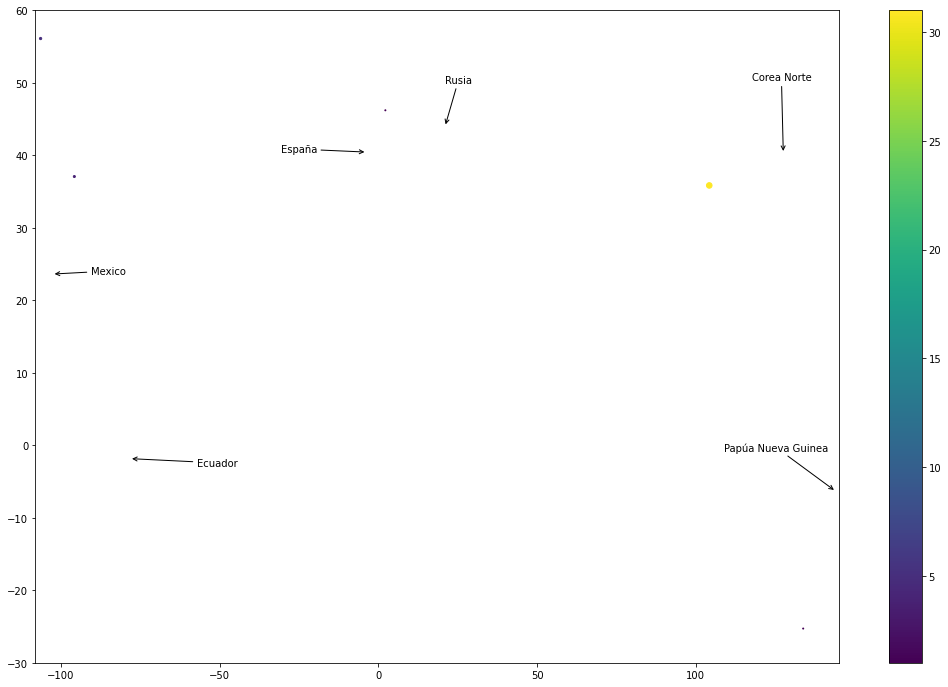

In [240]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(pais_long, pais_lat, s = pais_count, c= pais_count)
plt.colorbar()
plt.xlim(-108,145)
plt.ylim(-30, 60)
#add a few cities for reference (optional)
ard = dict(arrowstyle="->")
plt.annotate('Ecuador', xy = (-78.183406, -1.831239), 
               xytext = (-57.183406, -2.831239), arrowprops = ard)
plt.annotate('Rusia', xy = (21.005859, 44.016521), 
               xytext = (21.005859, 50.016521), arrowprops= ard)
plt.annotate('Papúa Nueva Guinea', xy = (143.95555, -6.314993), 
               xytext = (108.921327, -0.759275), arrowprops= ard)
plt.annotate('Mexico', xy = (-102.552784, 23.634501), 
               xytext = (-90.552784, 23.634501), arrowprops= ard)
plt.annotate('España', xy = (-3.74922, 40.463667), 
               xytext = (-30.74922, 40.463667), arrowprops= ard)
plt.annotate('Corea Norte', xy = (127.510093, 40.339852), 
               xytext = (117.510093, 50.339852), arrowprops= ard)

params = plt.gcf()
plSize = params.get_size_inches()
params.set_size_inches( (plSize[0] * 3, plSize[1] * 3) )
plt.show()